<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/ZadanieEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie EDA

Zmienna docelowa: SalePrice


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


object     43
int64      35
float64     3
Name: count, dtype: int64
Liczba zmiennych numerycznych: 38
Liczba zmiennych kategorycznych: 43


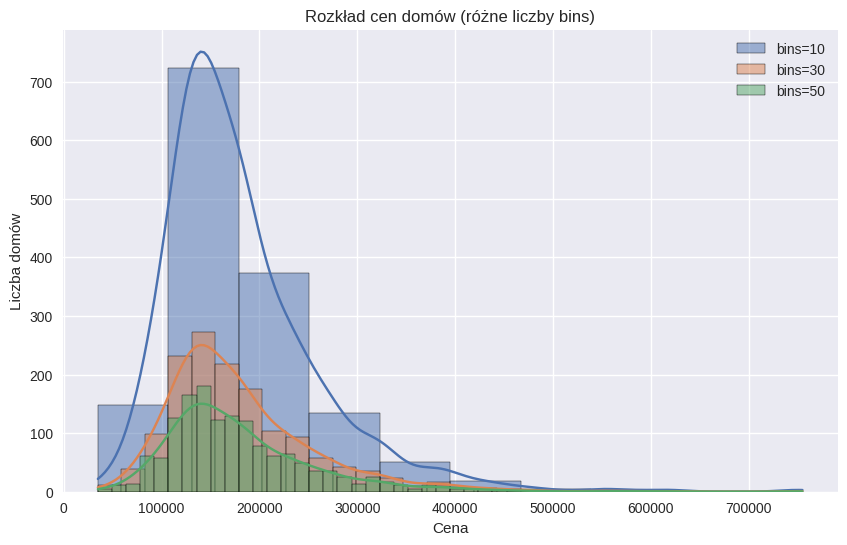

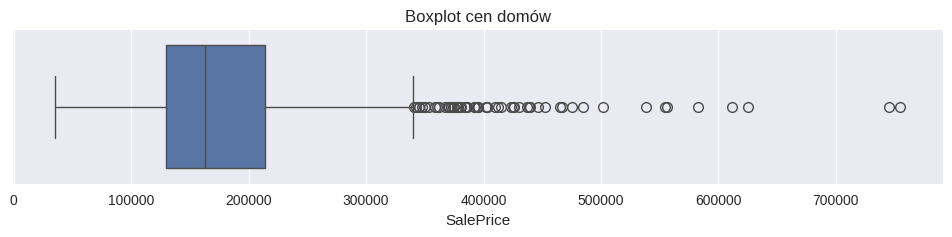


Min: 34900.0
Max: 755000.0
Średnia: 180921.20
Mediana: 163000.0
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0

Kolumny związane z powierzchnią: ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


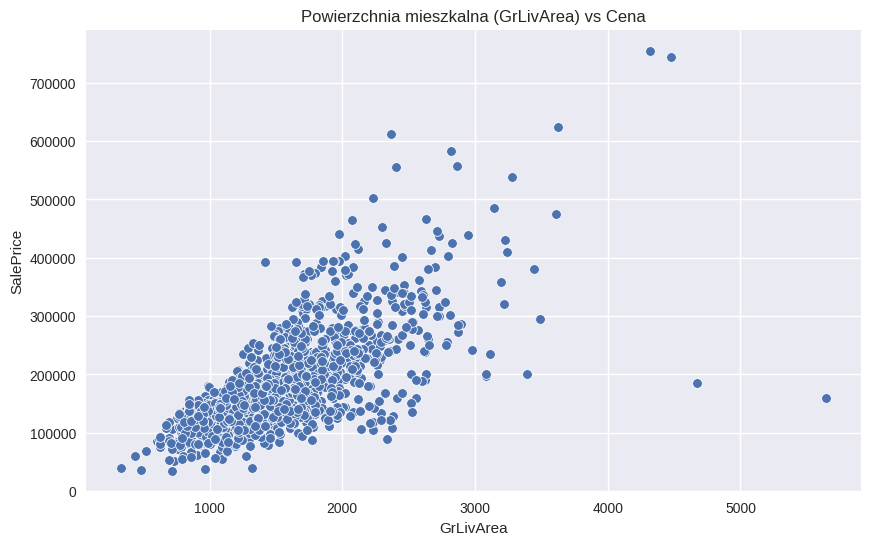

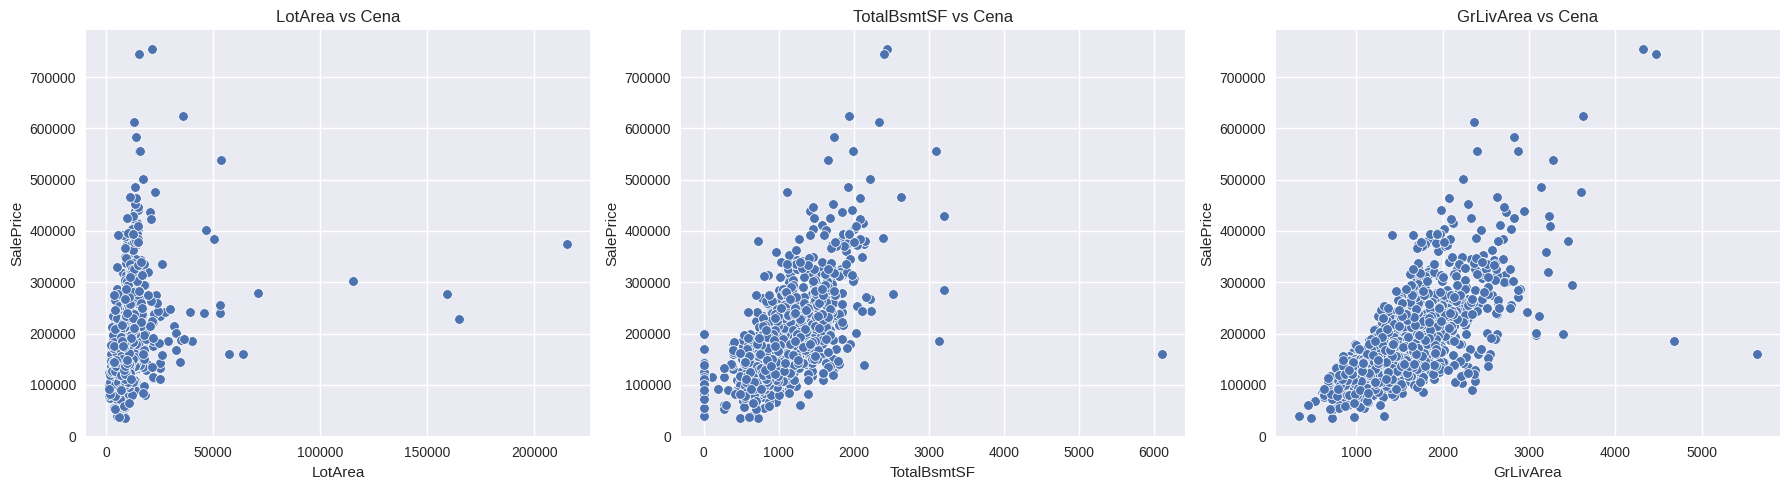

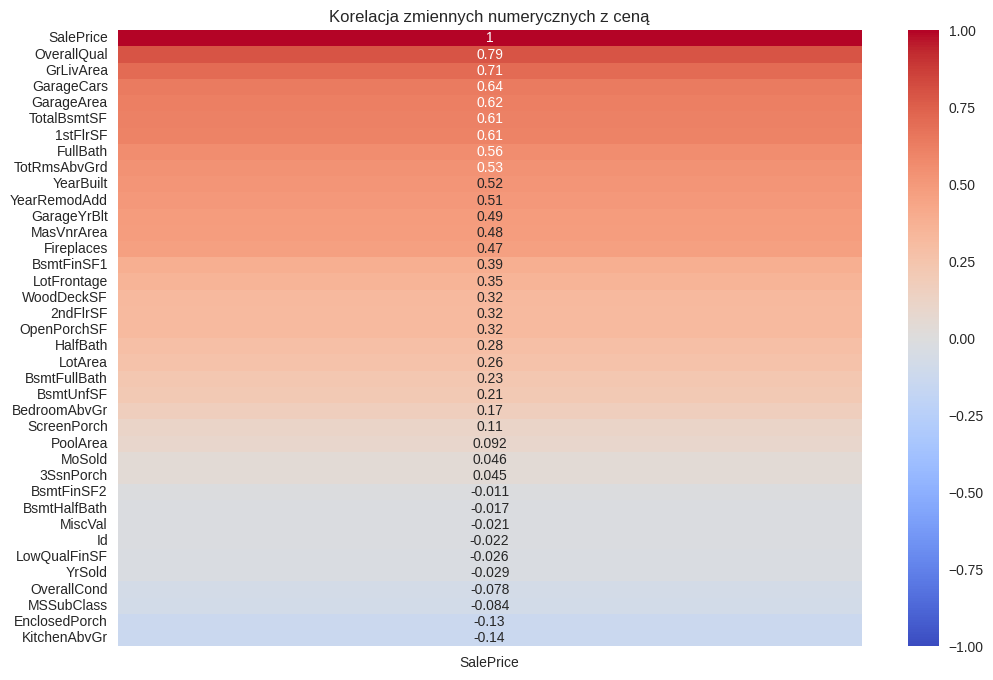

In [2]:
# 1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

# 2.
df = pd.read_csv("train.csv")
df.head()

# 3.
target = "SalePrice"
print(f"Zmienna docelowa: {target}")

# 4.
display(df.describe())
print(df.dtypes.value_counts())

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Liczba zmiennych numerycznych:", len(num_cols))
print("Liczba zmiennych kategorycznych:", len(cat_cols))

# 5.
plt.figure(figsize=(10,6))
for bins in [10, 30, 50]:
    sns.histplot(df['SalePrice'], bins=bins, kde=True, label=f"bins={bins}", alpha=0.5)
plt.legend()
plt.title("Rozkład cen domów (różne liczby bins)")
plt.xlabel("Cena")
plt.ylabel("Liczba domów")
plt.show()

plt.figure(figsize=(12,2))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot cen domów")
plt.show()

price_stats = df['SalePrice'].describe()
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
iqr = q3 - q1

print(f"""
Min: {price_stats['min']}
Max: {price_stats['max']}
Średnia: {price_stats['mean']:.2f}
Mediana: {df['SalePrice'].median()}
Q1: {q1}
Q3: {q3}
IQR: {iqr}
""")

# 6.
area_cols = [col for col in df.columns if "Area" in col or "SF" in col]
print("Kolumny związane z powierzchnią:", area_cols)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("Powierzchnia mieszkalna (GrLivArea) vs Cena")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# 7.
fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x=df['LotArea'], y=df['SalePrice'], ax=axs[0])
axs[0].set_title("LotArea vs Cena")

sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'], ax=axs[1])
axs[1].set_title("TotalBsmtSF vs Cena")

sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], ax=axs[2])
axs[2].set_title("GrLivArea vs Cena")

plt.tight_layout()
plt.show()

# 8.
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelacja zmiennych numerycznych z ceną")
plt.show()
